In [1]:
import matplotlib.pyplot as plt
from oqtant.schemas.quantum_matter import QuantumMatterFactory
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import rotate
from scipy.optimize import curve_fit
from copy import deepcopy

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│            20 │                 0 │                 60 │                  0 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [3]:
base_filename = "Background/Background_0_rep_"
num_runs = 3

repeated_trial_matters = [
    qmf.load_matter_from_file(f"{base_filename}{i:d}.txt", refresh=False)
    for i in range(num_runs)
]


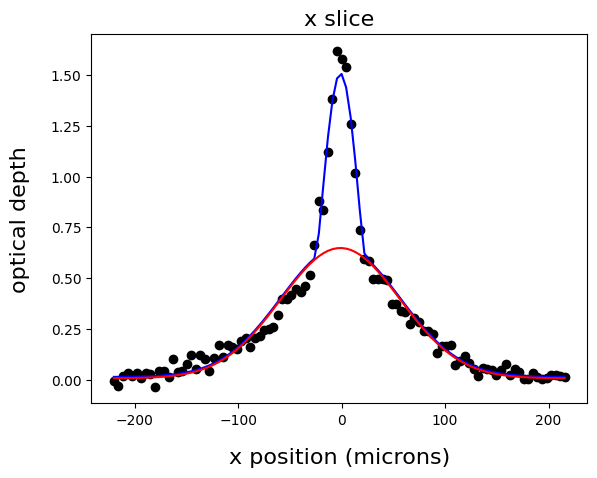

In [4]:
repeated_trial_matters[0].output.plot_slice()

In [7]:
def averageTOFMatterImages(matters):
    rows = matters[0].output.tof_image.rows
    columns = matters[0].output.tof_image.columns
    pixcal = matters[0].output.get_image_pixcal(image="TIME_OF_FLIGHT")
    avg_pixels = np.zeros((rows, columns))
    avg_slice = np.zeros(columns)
    
    for matter in matters:
        avg_pixels += matter.output.get_image_data(image="TIME_OF_FLIGHT")
        avg_slice += matter.output.get_image_data(image="TIME_OF_FLIGHT")[int(rows / 2)]
        
    num_runs = len(matters)
    avg_pixels /= num_runs
    avg_slice /= num_runs
    
    x_pos = np.arange(-columns / 2 * pixcal, columns / 2 * pixcal, pixcal)
    y_pos = np.arange(-rows / 2 * pixcal, rows / 2 * pixcal, pixcal)

    return avg_pixels, avg_slice, x_pos, y_pos

In [8]:
pix, slic, x, y = averageTOFMatterImages(repeated_trial_matters)

In [9]:
def plotTOFAveragedImages(pixels, slices, xpos, ypos, title):
    fig, axs = plt.subplots(nrows=2, sharex=True)
    fig.suptitle(title)
    im = axs[0].imshow(pixels,
                       extent=[xpos[0], xpos[-1], 
                               ypos[0], ypos[-1]],
                      )
    cbaxes = fig.add_axes([0.15, 0.6, 0.15, 0.02])
    cb = plt.colorbar(im, cax=cbaxes, ticks=[0.0, 1], orientation="horizontal")
    cbaxes.tick_params(color="w", labelcolor="w")
    
    axs[1].plot(xpos, slices, label="Slice @ Y=0")
    axs[1].set_ylabel("Optical Depth")
    axs[1].set_yticks([0, 0.5, 1])
    axs[1].set_xlabel("X position ($\mu$m)")
    axs[1].legend()
    axs[0].set_ylabel("Y position ($\mu$m)")
    plt.subplots_adjust(hspace=0)
    plt.show()

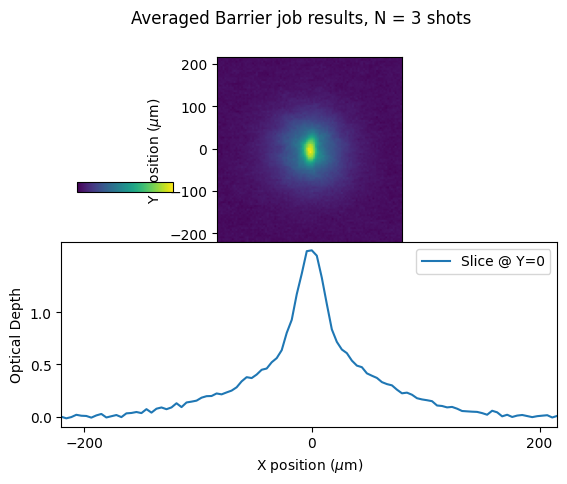

In [10]:
plotTOFAveragedImages(pix, slic, x, y, "Averaged Barrier job results, N = 3 shots")

### Fritsch Solitons 

In [11]:
exps = np.arange(0,80,20)
reps = np.arange(0,3)
FS2_matters = []

for exp in exps:
    matExp = []
    for rep in reps:
        mat = qmf.load_matter_from_file(f"HoldTime/FourLine/FS_hold_time_{exp:d}_rep_{rep:d}.txt", refresh=False)
        matExp.append(mat)
    FS2_matters.append(matExp)


In [12]:
FS2_matters[0][1].name

'FS_hold_time_0_rep_1'

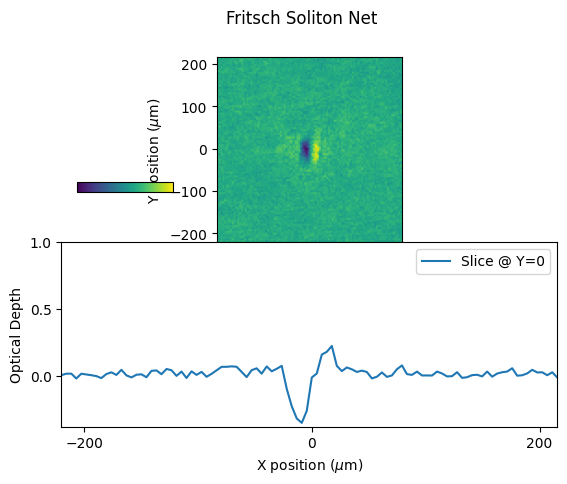

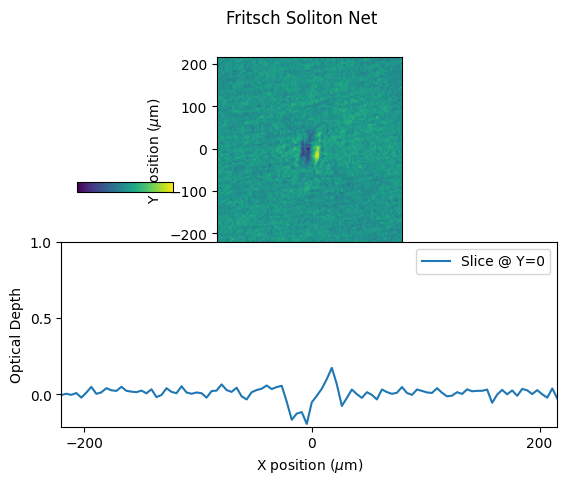

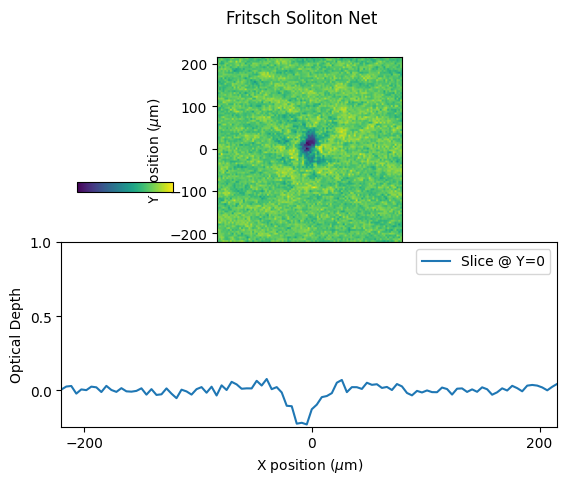

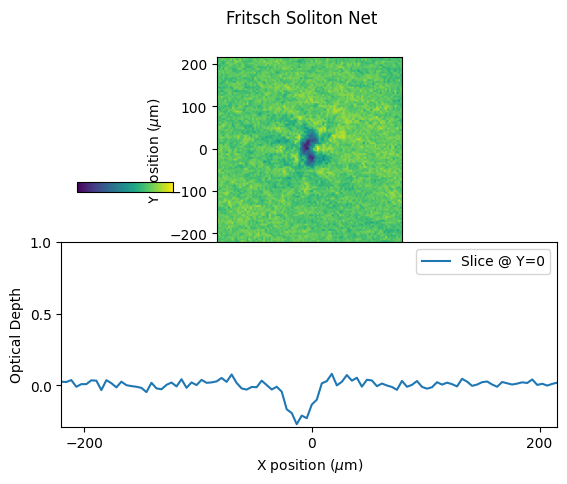

In [13]:
fs_min = []
for FS_matterRep in FS2_matters:
    fsPix, fsSl, fsX, fsYy = averageTOFMatterImages(FS_matterRep)
    fsNetPix = fsPix - pix
    fsNetSlice = fsSl - slic
    plotTOFAveragedImages(fsNetPix, fsNetSlice, x, y, "Fritsch Soliton Net")
    
    fs_min.append(np.argmin(fsNetSlice))

In [14]:
fs_min

[48, 49, 49, 47]

### Dark Solitons

In [15]:
exps = np.arange(0,80,20)
reps = np.arange(0,2)
DS2_matters = []

for exp in exps:
    matExp = []
    for rep in reps:
        mat = qmf.load_matter_from_file(f"Dark/FourLine/DS_hold_time_{exp:d}_rep_{rep:d}.txt", refresh=False)
        matExp.append(mat)
    DS2_matters.append(matExp)

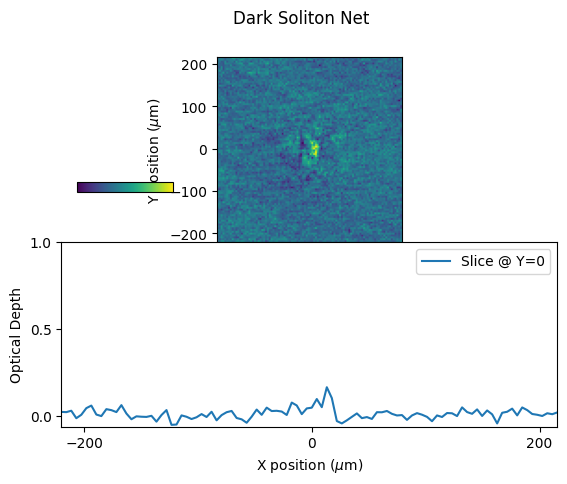

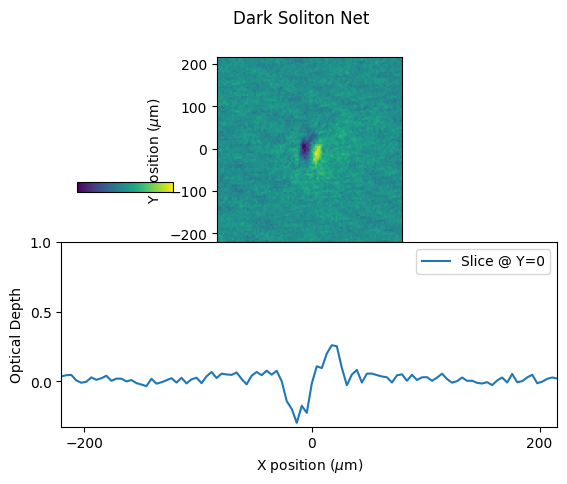

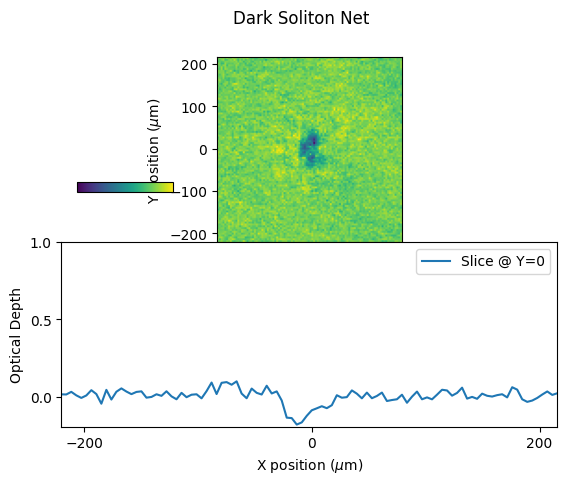

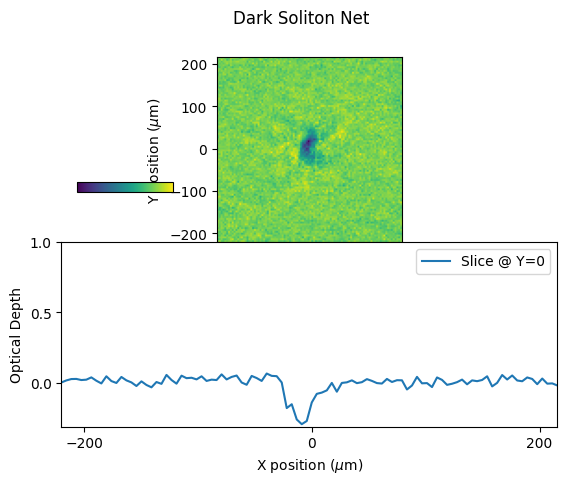

In [16]:
ds_min = []
for DS_matter in DS2_matters:
    dsPix, dsSl, dsX, dsYy = averageTOFMatterImages(DS_matter)
    dsNetPix = dsPix - pix
    dsNetSlice = dsSl - slic
    plotTOFAveragedImages(dsNetPix, dsNetSlice, x, y, "Dark Soliton Net")
    
    ds_min.append(np.argmin(dsNetSlice))


In [17]:
ds_min

[22, 47, 47, 48]